This notebook plots several different simulations produced during the OptWRF run that have different radiation parameterization schemes. Direct comparisons may be difficult as these simulations were not necessarily initialized on the same date, but ideally we can gain some insight by looking at the plots. 

In [1]:
# plotting stuff
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# python built-in 
import os
import inspect

# python add-ons
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from wrf import to_np

# Import the optwrf module
import optwrf
from optwrf import runwrf 
from optwrf import helper_functions as hf
from optwrf import plots as owplt

### Load Required Data Files
Start by defining the file locations for the wrf simulation that you would like to create plots for. I put them in `~/optwrf/data/optwrf_sim`. You also need to specify the ERA5 data path. I use `~/optwrf/data/ERA5/`.

In [5]:
# Verbose setting
verbose = True

# Find the absolute file path to your optwrf package
optwrf_abspath = os.path.dirname(os.path.abspath(inspect.getfile(optwrf)))
optwrf_abspath

# Specify the path to the wrfout files and era data files
wrfdir = os.path.join(optwrf_abspath, 'data/optwrf_sim/')
eradir = os.path.join(optwrf_abspath, 'data/ERA5/')

# Define the datestr, paramstr, and wrfout file names
datestrs = ['2011-12-13',
            '2011-01-14', 
            '2011-10-22',]
paramstrs = ['19mp4lw4sw7lsm8pbl99cu', 
             '19mp4lw1sw7lsm8pbl99cu', 
             '19mp4lw3sw7lsm8pbl99cu',]

wrffile_suffixes = [f'{datestr}_{paramstr}' for datestr, paramstr in zip(datestrs, paramstrs)]

wrffile_names = [f'wrfout_processed_d01_{wrffile_suffix}.nc' for wrffile_suffix in wrffile_suffixes]
if verbose:
    print(wrffile_names)
    
era5file_names = ['ERA5_EastUS_WPD-GHI_2011-12.nc', 
                  'ERA5_EastUS_WPD-GHI_2011-01.nc',
                  'ERA5_EastUS_WPD-GHI_2011-10.nc']

['wrfout_processed_d01_2011-12-13_19mp4lw4sw7lsm8pbl99cu.nc', 'wrfout_processed_d01_2011-01-14_19mp4lw1sw7lsm8pbl99cu.nc', 'wrfout_processed_d01_2011-10-22_19mp4lw3sw7lsm8pbl99cu.nc']


In [3]:
# Open the processed wrfout files
wrffile1 = os.path.join(wrfdir, wrffile_names[0])
wrfdata1 = xr.open_dataset(wrffile1)
if verbose: 
    print(f'Processeed WRF DATA ({wrffile_names[0]}):\n{wrfdata1}\n')
wrffile2 = os.path.join(wrfdir, wrffile_names[1])
wrfdata2 = xr.open_dataset(wrffile2)
if verbose: 
    print(f'Processeed WRF DATA ({wrffile_names[1]}):\n{wrfdata2}\n')
wrffile3 = os.path.join(wrfdir, wrffile_names[2])
wrfdata3 = xr.open_dataset(wrffile3)
if verbose: 
    print(f'Processeed WRF DATA ({wrffile_names[2]}):\n{wrfdata3}\n')
    
# Open the processed ERA5 data files
erafile1 = os.path.join(eradir, era5file_names[0])
eradata1 = xr.open_dataset(erafile1)
if verbose:
    print(f'ERA5 DATA ({era5file_names[0]}):\n{eradata1}')
erafile2 = os.path.join(eradir, era5file_names[1])
eradata2 = xr.open_dataset(erafile2)
if verbose:
    print(f'ERA5 DATA ({era5file_names[1]}):\n{eradata2}')
erafile3 = os.path.join(eradir, era5file_names[2])
eradata3 = xr.open_dataset(erafile3)
if verbose:
    print(f'ERA5 DATA ({era5file_names[2]}):\n{eradata3}')

Processeed WRF DATA (wrfout_processed_d01_2011-12-13_19mp4lw4sw7lsm8pbl99cu.nc):
<xarray.Dataset>
Dimensions:         (Time: 24, bottom_top: 35, south_north: 191, west_east: 191)
Coordinates:
  * Time            (Time) datetime64[ns] 2011-12-13 ... 2011-12-13T23:00:00
    lon             (south_north, west_east) float32 ...
    lat             (south_north, west_east) float32 ...
Dimensions without coordinates: bottom_top, south_north, west_east
Data variables:
    Times           (Time) datetime64[ns] ...
    temp_air        (Time, south_north, west_east) float32 ...
    wind_speed_u    (Time, south_north, west_east) float32 ...
    wind_speed_v    (Time, south_north, west_east) float32 ...
    cloud_fraction  (Time, bottom_top, south_north, west_east) float32 ...
    cos_zenith      (Time, south_north, west_east) float32 ...
    dni             (Time, south_north, west_east) float32 ...
    dhi             (Time, south_north, west_east) float32 ...
    ghi             (Time, south_no

## Plots Comparing GHI
The following will plots will compare the GHI in the WRF simulation and the ERA5 reanalysis data. A separate set of plots will show the difference (error) between the two. Again, recall that these simulations were not initialized on the same day. In both plots, you can toggle the `hourly=False` option back and forth to get a daily or hourly plots, respectively. We will begin with the simulation using the longwave and shortwave RRTMG schemes (namelist option 4).

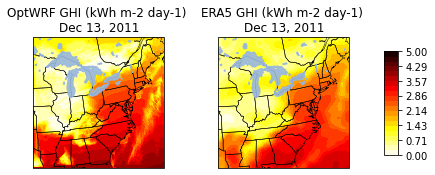

In [6]:
fig_path = f'/Users/jsward/Box Sync/01_Research/01_Renewable_Analysis/WRF_Solar_and_Wind/' \
           f'figures/daily_WRF_ERA5_GHI_compare_plot_{wrffile_suffixes[0]}'
owplt.compare_wrf_era5_plot('ghi', wrfdata1, eradata1, hourly=False, save_fig=False, fig_path=fig_path)

The file name is: bilinear_191x191_97x129.nc and reuse_weights is: False


/opt/anaconda3/envs/optwrf/lib/python3.7/site-packages/scipy/sparse/_index.py:124: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


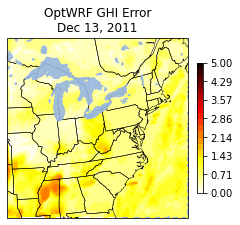

In [8]:
fig_path = f'/Users/jsward/Box Sync/01_Research/01_Renewable_Analysis/WRF_Solar_and_Wind/' \
    f'figures/hourly_WRF_ghierror_plot_{wrffile_suffixes[0]}'
owplt.wrf_era5_plot('ghi_error', wrfdata1, eradata1, datestrs[0], src='wrf', hourly=False, save_fig=False,
                    wrf_dir=wrfdir, era_dir=eradir, short_title_str='OptWRF GHI Error', fig_path=fig_path)

Next, we will look at a simulation using the RRTMG longwave scheme (namelist option 4) and the shortwave Dudia scheme (namelist option 1).

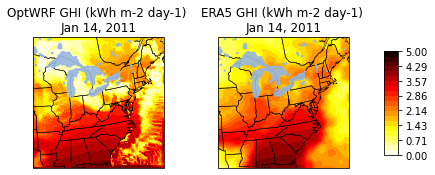

In [14]:
fig_path = f'/Users/jsward/Box Sync/01_Research/01_Renewable_Analysis/WRF_Solar_and_Wind/' \
           f'figures/daily_WRF_ERA5_GHI_compare_plot_{wrffile_suffixes[1]}'
owplt.compare_wrf_era5_plot('ghi', wrfdata2, eradata2, hourly=False, save_fig=False, fig_path=fig_path)

In [10]:
fig_path = f'/Users/jsward/Box Sync/01_Research/01_Renewable_Analysis/WRF_Solar_and_Wind/' \
    f'figures/hourly_WRF_ghierror_plot_{wrffile_suffixes[1]}'
owplt.wrf_era5_plot('ghi_error', wrfdata2, eradata2, datestrs[1], src='wrf', hourly=False, save_fig=False,
                    wrf_dir=wrfdir, era_dir=eradir, short_title_str='OptWRF GHI Error', fig_path=fig_path)

The file name is: bilinear_191x191_97x129.nc and reuse_weights is: False


/opt/anaconda3/envs/optwrf/lib/python3.7/site-packages/scipy/sparse/_index.py:124: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


KeyError: '2011-01-14T00:00:00.000000000'

Finally, we will look at a simulation using the RRTMG longwave scheme (namelist option 4) and the shortwave CAM scheme (namelist option 3).

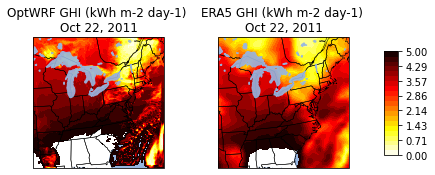

In [12]:
fig_path = f'/Users/jsward/Box Sync/01_Research/01_Renewable_Analysis/WRF_Solar_and_Wind/' \
           f'figures/daily_WRF_ERA5_GHI_compare_plot_{wrffile_suffixes[2]}'
owplt.compare_wrf_era5_plot('ghi', wrfdata3, eradata3, hourly=False, save_fig=False, fig_path=fig_path)

In [13]:
fig_path = f'/Users/jsward/Box Sync/01_Research/01_Renewable_Analysis/WRF_Solar_and_Wind/' \
    f'figures/hourly_WRF_ghierror_plot_{wrffile_suffixes[2]}'
owplt.wrf_era5_plot('ghi_error', wrfdata3, eradata3, datestrs[2], src='wrf', hourly=False, save_fig=False,
                    wrf_dir=wrfdir, era_dir=eradir, short_title_str='OptWRF GHI Error', fig_path=fig_path)

The file name is: bilinear_191x191_97x129.nc and reuse_weights is: False


/opt/anaconda3/envs/optwrf/lib/python3.7/site-packages/scipy/sparse/_index.py:124: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


KeyError: '2011-10-22T00:00:00.000000000'